In [271]:
import numpy as np
import editdistance
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(context='paper', style='ticks', font_scale=1)

## Sampling pseudoword pairs from the ARC database

All of the pseudowords were retreived from the [ARC database](http://www.cogsci.mq.edu.au/research/resources/nwdb/). Read all the 3-letter pseudowords:

In [272]:
letters_3 = pd.read_csv('3_letters.txt', header=None, delim_whitespace=True)
letters_3.columns = ['word', 'transcription']
letters_3.head(10)

,word,transcription
0,osp,Qsp
1,wob,wQb
2,foz,fQz
3,vyt,vIt
4,bik,bIk
5,faz,f{z
6,dav,d{v
7,yez,jEz
8,zit,zIt
9,zos,zQs


Read all the 7-letter pseudowords:

In [273]:
letters_7 = pd.read_csv('7_letters.txt', header=None, delim_whitespace=True)
letters_7.columns = ['word', 'transcription']
letters_7.head(10)

,word,transcription
0,shylned,SIlnd
1,twaudge,tw9_
2,gnownse,n6ns
3,phlorbs,fl9bz
4,gueksed,gEkst
5,twammth,tw{mT
6,skeinge,sk1n_
7,propced,prQpst
8,skroarb,skr9b
9,twounts,tw6nts


Find all the pairs with edit distance of 7 from the list of all combinations of 3-letter and 7-letter pseudowords:

In [274]:
# initialize matrix
lev_matrix = np.zeros((len(letters_7), len(letters_3)))

# fill matrix
for i in range(len(letters_7)):
    for j in range(len(letters_3)):
        lev_matrix[i, j] = editdistance.eval(letters_7['word'][i], letters_3['word'][j])

In [275]:
# find pairs where all the levenstein distances are the same
pairs = []

for i in range(len(letters_7)):
    for j in range(len(letters_3)):
        if lev_matrix[i, j] == 7:
            pairs.append((letters_7['word'][i], letters_3['word'][j]))


In [276]:
# select ten random unique pairs
pairs = list(set(pairs))

# random choice knowing pairs is a lsit of tuples so from rnage
i = np.random.choice(range(len(pairs)), size=10, replace=False)

# select 10 random pairs
pairs_ = [pairs[j] for j in i]

In [277]:
pairs_

[('wrympte', 'nig'),
 ('gueksed', 'oct'),
 ('ghawnts', 'oid'),
 ('gleupth', 'ciz'),
 ('scwighk', 'jov'),
 ('zighled', 'sny'),
 ('screths', 'kig'),
 ('klolmbs', 'aph'),
 ('ghygned', 'vul'),
 ('kwontch', 'gim')]

In [279]:
# print 7 and 3 letter words as lists
print([pair[0] for pair in pairs_])
print([pair[1] for pair in pairs_])

['wrympte', 'gueksed', 'ghawnts', 'gleupth', 'scwighk', 'zighled', 'screths', 'klolmbs', 'ghygned', 'kwontch']
['nig', 'oct', 'oid', 'ciz', 'jov', 'sny', 'kig', 'aph', 'vul', 'gim']


Plot the matrix with the sampled pairs:

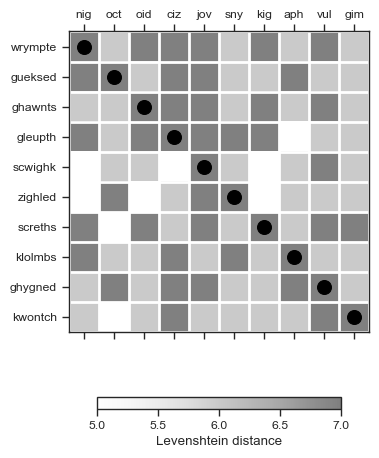

In [280]:
# Initialize matrix
lev_matrix = np.zeros((len(pairs_), len(pairs_)))

# Fill matrix
for i in range(len(pairs_)):
    for j in range(len(pairs_)):
        lev_matrix[i, j] = editdistance.eval(pairs_[i][0], pairs_[j][1])

# Plot matrix with white borders between cells
fig, ax = plt.subplots()
cax = ax.matshow(lev_matrix, cmap='Greys', interpolation='nearest', alpha=0.5, vmax=7)

# Add colorbar
cbar = plt.colorbar(cax, label='Levenshtein distance', shrink=0.4, orientation='horizontal')
cbar.ax.xaxis.set_ticks_position('bottom')

# Add xticks
plt.xticks(np.arange(len(pairs_)), [p[1] for p in pairs_], rotation=90)

# Add yticks
plt.yticks(np.arange(len(pairs_)), [p[0] for p in pairs_])

# Add dots at the diagonal
plt.scatter(range(len(pairs_)), range(len(pairs_)), color='black', s=100)

# Draw gridlines between cells to create white borders
ax.set_xticks(np.arange(-0.5, len(pairs_), 1), minor=True)
ax.set_yticks(np.arange(-0.5, len(pairs_), 1), minor=True)
ax.grid(which='minor', color='white', linestyle='-', linewidth=2)

# rotate the xticks
plt.xticks(rotation=360)

# Turn gridlines off for major ticks
ax.tick_params(which='minor', size=0)

plt.tight_layout()

# save figure
plt.savefig('lev_matrix.pdf', dpi=300)

# Show plot
plt.show()